## English premier league 2024/25 analysis

- Problem Statement:
    - Identifying Overrated and Underrated Players in the 2024/25 EPL Season by Position
- Project Objective:
    - To assess and rank players on how much impact/contribution they make with respect to their market value. 
    - Provide recommendations to football scouts and managers to identify value for money players for recruitment.


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.0f}'.format)

### Cleaning Dataset 1: EPL Player Stats 24/25 Season

In [43]:
# Read main dataset for 24/25 season as dataframe
epl_stats_df = pd.read_csv('./dataset/epl_player_stats_24_25.csv')
epl_stats_df

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,13%,0,0,1,833,1678,1493,89%,51,10,20%,714,592,83%,4,583,296,0,0,5,17,107,6,5,38,23,6,20,231,116,50%,16,5,31%,0,0,0,10,2,0,0,0%,0,0,0,0,0
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,25%,8,0,7,1094,643,556,87%,1,0,0%,55,33,60%,1,167,69,0,0,1,0,44,40,2,6,15,14,29,58,34,59%,45,23,51%,0,0,0,15,3,0,0,0%,0,0,0,0,0
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,0%,0,0,0,1599,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,13,29,0,0,0,0,0,0%,0,0,0%,34,36,0,1,3,0,86,72%,0,0,8,53,2
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,15%,2,0,2,2016,789,641,81%,63,7,11%,480,364,76%,11,411,260,3,2,18,22,121,32,7,50,13,5,53,342,121,35%,26,10,39%,0,0,0,21,5,1,0,0%,0,0,0,0,0
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,0%,0,3,6,601,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,17,1,4,0,0,11,0,0,0%,0,0,0%,0,0,0,9,1,0,0,0%,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,0%,0,1,0,1046,1195,1077,90%,18,7,39%,325,278,86%,1,292,144,0,0,4,4,109,2,4,70,28,7,41,212,102,48%,44,19,43%,0,0,0,26,2,0,0,0%,0,0,0,0,0
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,0%,0,0,0,1,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0%,0,0,0,0,0
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,0%,1,0,0,478,0,0,0%,0,0,0%,0,0,0%,0,0,0,0,0,0,0,0,4,0,11,0,0,11,0,0,0%,0,0,0%,0,0,0,5,1,0,0,0%,0,0,0,0,0
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,8,7%,1,0,4,2110,1616,1256,78%,93,23,25%,673,470,70%,12,350,190,1,1,11,11,132,15,8,147,31,9,61,197,98,50%,16,3,19%,0,0,0,24,7,0,0,0%,0,2,0,0,0


In [44]:
epl_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    object 
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

In [45]:
# Convert percentages columns from object type to float64
perc_columns = [col for col in epl_stats_df.columns if '%' in col]

for feature in perc_columns:
    epl_stats_df[feature] = epl_stats_df[feature].str.replace('%', '').astype(float) / 100

In [46]:
epl_stats_df.info()
epl_stats_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                562 non-null    object 
 1   Club                       562 non-null    object 
 2   Nationality                562 non-null    object 
 3   Position                   562 non-null    object 
 4   Appearances                562 non-null    int64  
 5   Minutes                    562 non-null    int64  
 6   Goals                      562 non-null    int64  
 7   Assists                    562 non-null    int64  
 8   Shots                      562 non-null    int64  
 9   Shots On Target            562 non-null    int64  
 10  Conversion %               562 non-null    float64
 11  Big Chances Missed         562 non-null    int64  
 12  Hit Woodwork               562 non-null    int64  
 13  Offsides                   562 non-null    int64  

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented'],
      

### Cleaning Dataset 2: Players Valuation from TransferMarkt

In [47]:
players_df = pd.read_csv('./dataset/dataset2/players.csv')
valuation_df = pd.read_csv('./dataset/dataset2/player_valuations.csv')

In [48]:
# Dataset to get player names
players_df.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,9/6/1978 0:00,Centre-Forward,Attack,right,184,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000,30000000
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,6/8/1980 0:00,Goalkeeper,Goalkeeper,left,190,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000,8000000
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,30/1/1981 0:00,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000,34500000
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,8/5/1978 0:00,Centre-Back,Defender,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000,24500000
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,18/3/1981 0:00,Goalkeeper,Goalkeeper,right,194,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000,3000000


In [49]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date_of_birth                         32554 non-null  object 
 11  sub_position   

In [50]:
# Convert date_of_birth to datetime
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'], format='%d/%m/%Y %H:%M')

In [51]:
# Dataset for player valuations
valuation_df.head()
valuation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            496606 non-null  int64 
 1   date                                 496606 non-null  object
 2   market_value_in_eur                  496606 non-null  int64 
 3   current_club_id                      496606 non-null  int64 
 4   player_club_domestic_competition_id  496606 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.9+ MB


In [52]:
# Convert date to datetime format
valuation_df['date'] = pd.to_datetime(valuation_df['date'])

In [53]:
# Filter to only get player valuations from EPL (competition id = GB1)
epl_valuation_df = valuation_df[valuation_df['player_club_domestic_competition_id'] == 'GB1'].copy()
epl_valuation_df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
3,6893,2003-12-15,900000,984,GB1
11,132,2004-10-04,13000000,11,GB1
23,488,2004-10-04,1000000,2288,GB1
66,1397,2004-10-04,30000000,512,GB1
78,1573,2004-10-04,4500000,29,GB1
...,...,...,...,...,...
494933,1011147,2025-03-18,15000000,148,GB1
494934,1012534,2025-03-18,30000000,1237,GB1
494935,1047261,2025-03-18,1000000,873,GB1
494936,1063329,2025-03-18,7000000,405,GB1


As player valuations are constantly changing throughout the season, we will use the closest valuations prior to the start of the EPL 2024/25 season on 2024-08-16.
The purpose of our analysis is to determine which players strongly outperformed/underperformed compared to their valuations during the start of the season.

In [54]:
# Start of the EPL 2024/25 season
season_start = pd.Timestamp("2024-08-16")

In [55]:
# Compute absolute difference from start date
epl_valuation_df['date_diff'] = (epl_valuation_df['date'] - season_start).abs()

# Get the closest valuation to season start per player
closest_valuation = (
    epl_valuation_df.sort_values(by=['player_id', 'date_diff'])
    .groupby('player_id')
    .first()
    .reset_index()
)

In [56]:
player_valuation_df = pd.merge(closest_valuation, players_df, on='player_id', how='left')

In [57]:
# Calculate player age at start of season
player_valuation_df['Age'] = (season_start - player_valuation_df['date_of_birth']).abs()

# Convert age to years
player_valuation_df['Age'] = player_valuation_df['Age'].dt.days / 365.25

In [58]:
final_player_val_df = player_valuation_df[['name','market_value_in_eur_x', 'Age']].copy()
final_player_val_df.rename(columns={'name':'Player_Name','market_value_in_eur_x':'Player_Value_In_EUR'}, inplace = True)

In [59]:
final_player_val_df
final_player_val_df[final_player_val_df['Player_Name'].duplicated(keep=False)]

,Player_Name,Player_Value_In_EUR,Age
126,Tommy Smith,250000,44
434,Adam Smith,1000000,33
642,Tommy Smith,700000,32
656,Danny Ward,700000,34
767,Adam Smith,200000,32
864,Danny Ward,1800000,31
967,Reece James,400000,31
1426,Reece James,35000000,25


In [60]:
final_player_val_df.drop_duplicates(subset=['Player_Name'], keep='last',inplace=True)

In [61]:
final_player_val_df

,Player_Name,Player_Value_In_EUR,Age
0,Tomas Rosicky,350000,44
1,Gerhard Tremmel,250000,46
2,Michael Owen,1000000,45
3,Thomas Hitzlsperger,1000000,42
4,Bastian Schweinsteiger,1000000,40
...,...,...,...
2028,Amara Nallo,200000,18
2029,Yunus Emre Konak,3500000,19
2030,Benjamin Arthur,250000,19
2031,Aarón Anselmino,8000000,19


### Combine Dataset 1 and 2 to get our final dataset with all the player stats and their valuations during the start of the season

In [62]:
# Clean up the player names in both dataset before merging for better standardization
import unicodedata

def clean_name(name):
    # Remove accents
    name = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('utf-8')
    # Lowercase
    name = name.lower()
    # Strip extra spaces and normalize
    name = ' '.join(name.strip().split())
    return name

# Apply to both datasets
epl_stats_df['Clean_Player_Name'] = epl_stats_df['Player Name'].apply(clean_name)
final_player_val_df['Clean_Player_Name'] = final_player_val_df['Player_Name'].apply(clean_name)

In [63]:
# Merge the dataset and drop the Player_Name column from the player valuations dataframe
epl_final_df = pd.merge(epl_stats_df, final_player_val_df, on='Clean_Player_Name',how='left')
epl_final_df

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented,Clean_Player_Name,Player_Name,Player_Value_In_EUR,Age
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,0,0,0,1,833,1678,1493,1,51,10,0,714,592,1,4,583,296,0,0,5,17,107,6,5,38,23,6,20,231,116,0,16,5,0,0,0,0,10,2,0,0,0,0,0,0,0,0,ben white,Ben White,55000000,27
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,0,8,0,7,1094,643,556,1,1,0,0,55,33,1,1,167,69,0,0,1,0,44,40,2,6,15,14,29,58,34,1,45,23,1,0,0,0,15,3,0,0,0,0,0,0,0,0,bukayo saka,Bukayo Saka,140000000,23
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,0,0,0,0,1599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,29,0,0,0,0,0,0,0,0,0,34,36,0,1,3,0,86,1,0,0,8,53,2,david raya,David Raya,35000000,29
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,0,2,0,2,2016,789,641,1,63,7,0,480,364,1,11,411,260,3,2,18,22,121,32,7,50,13,5,53,342,121,0,26,10,0,0,0,0,21,5,1,0,0,0,0,0,0,0,declan rice,Declan Rice,120000000,26
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,0,0,3,6,601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,1,4,0,0,11,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,ethan nwaneri,Ethan Nwaneri,12000000,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,0,0,1,0,1046,1195,1077,1,18,7,0,325,278,1,1,292,144,0,0,4,4,109,2,4,70,28,7,41,212,102,0,44,19,0,0,0,0,26,2,0,0,0,0,0,0,0,0,santiago bueno,Santiago Bueno,8000000,26
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,tom king,Tom King,200000,29
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,0,1,0,0,478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,11,0,0,11,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,tommy doyle,Tommy Doyle,10000000,23
560,Toti Gomes,Wolverhampton Wanderers,Portugal,DEF,31,2615,0,0,7,8,0,1,0,4,2110,1616,1256,1,93,23,0,673,470,1,12,350,190,1,1,11,11,132,15,8,147,31,9,61,197,98,0,16,3,0,0,0,0,24,7,0,0,0,0,2,0,0,0,toti gomes,NaN,NaN,NaN


In [64]:
# Inspect final dataset and observed some player valuations are not found
missing_players = pd.DataFrame(epl_final_df['Clean_Player_Name'][epl_final_df['Player_Value_In_EUR'].isna()])
missing_players

,Clean_Player_Name
29,diego carlos
31,emiliano buendia
38,kosta nedeljkovic
55,ben winterburn
62,illia zabarnyi
...,...
537,daniel podence
540,hwang hee-chan
545,mario lemina
547,mateus mane


In [65]:
# Using fuzzy matching to map names that might not be detected due to naming convention
from rapidfuzz import process

# Create a mapping of unmatched names
unmatched = final_player_val_df[~final_player_val_df['Clean_Player_Name'].isin(epl_stats_df['Clean_Player_Name'])]
matched_names = []
unmatched_names = []

for name in unmatched['Clean_Player_Name'].unique():
    result = process.extractOne(name, epl_stats_df['Clean_Player_Name'], score_cutoff=92)
    if result is not None:
        match, score, _ = result
        matched_names.append((name, match))

# Convert to DataFrame for merging
fuzzy_map_df = pd.DataFrame(matched_names, columns=['valuation_name', 'player_name'])

In [66]:
fuzzy_map_df

,valuation_name,player_name
0,heung-min son,son heung-min
1,hee-chan hwang,hwang hee-chan
2,altay bayndr,altay bayindir
3,ferdi kadoglu,ferdi kadioglu
4,vitaliy mykolenko,vitalii mykolenko
5,ben brereton diaz,ben brereton
6,hakon rafn valdimarsson,hakon valdimarsson
7,albert grnbaek,albert grnbk
8,mykhaylo mudryk,mykhailo mudryk
9,ji-soo kim,kim ji-soo


In [67]:
final_player_val_df = final_player_val_df.merge(fuzzy_map_df, left_on='Clean_Player_Name', right_on='valuation_name', how='left')

In [68]:
final_player_val_df

,Player_Name,Player_Value_In_EUR,Age,Clean_Player_Name,valuation_name,player_name
0,Tomas Rosicky,350000,44,tomas rosicky,NaN,NaN
1,Gerhard Tremmel,250000,46,gerhard tremmel,NaN,NaN
2,Michael Owen,1000000,45,michael owen,NaN,NaN
3,Thomas Hitzlsperger,1000000,42,thomas hitzlsperger,NaN,NaN
4,Bastian Schweinsteiger,1000000,40,bastian schweinsteiger,NaN,NaN
...,...,...,...,...,...,...
2024,Amara Nallo,200000,18,amara nallo,NaN,NaN
2025,Yunus Emre Konak,3500000,19,yunus emre konak,yunus emre konak,yunus konak
2026,Benjamin Arthur,250000,19,benjamin arthur,NaN,NaN
2027,Aarón Anselmino,8000000,19,aaron anselmino,NaN,NaN


In [69]:
# Use fuzzy matched name if available, else keep original
final_player_val_df['final_name'] = final_player_val_df['player_name'].fillna(final_player_val_df['Clean_Player_Name'])


In [70]:
# Merge on the final_name and epl_stats_df cleaned name
epl_final_merged_df = pd.merge(epl_stats_df, final_player_val_df, left_on='Clean_Player_Name', right_on='final_name',how='left')

In [71]:
# Drop all the unnecessary columns and any remaining rows with missing player_values
epl_final_merged_df = epl_final_merged_df.drop(columns=['Clean_Player_Name_x','Player_Name','Clean_Player_Name_y','valuation_name','player_name','final_name']).dropna(subset='Player_Value_In_EUR')

In [72]:
epl_final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 561
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player Name                498 non-null    object 
 1   Club                       498 non-null    object 
 2   Nationality                498 non-null    object 
 3   Position                   498 non-null    object 
 4   Appearances                498 non-null    int64  
 5   Minutes                    498 non-null    int64  
 6   Goals                      498 non-null    int64  
 7   Assists                    498 non-null    int64  
 8   Shots                      498 non-null    int64  
 9   Shots On Target            498 non-null    int64  
 10  Conversion %               498 non-null    float64
 11  Big Chances Missed         498 non-null    int64  
 12  Hit Woodwork               498 non-null    int64  
 13  Offsides                   498 non-null    int64  
 14 

### Exploratory Data Analysis (EDA)

In [73]:
epl_stats_df.shape

(562, 58)

In [74]:
epl_final_merged_df.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented',
       

### There are total of 498 players' stats in this dataset, with 58 features for our analysis.

In [75]:
epl_final_merged_df.describe()

,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented,Player_Value_In_EUR,Age
count,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
mean,22,1449,2,1,19,6,0,2,1,2,927,548,466,0,16,3,0,162,122,0,2,151,79,0,0,4,4,53,14,2,33,11,5,25,93,46,0,34,17,0,2,2,0,16,3,0,4,0,0,0,0,1,0,22983183,26
std,12,1033,3,2,23,10,0,4,1,4,722,610,533,0,26,6,0,184,144,0,4,166,91,1,1,7,6,57,16,3,43,13,8,25,102,51,0,45,25,0,9,9,0,15,3,0,19,0,0,0,3,7,1,22909472,4
min,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-4,100000,17
25%,13,490,0,0,2,0,0,0,0,0,295,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,0,0,5,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,8000000,23
50%,25,1382,1,0,12,2,0,1,0,1,828,402,299,1,3,0,0,120,80,1,0,117,60,0,0,0,1,42,8,1,16,5,1,17,74,36,0,18,7,0,0,0,0,12,2,0,0,0,0,0,0,0,0,18000000,26
75%,33,2333,2,2,28,8,0,3,1,3,1413,954,803,1,21,4,0,277,201,1,3,261,133,0,0,5,5,94,22,3,44,18,8,39,163,84,1,54,25,1,0,0,0,24,5,0,0,0,0,0,0,0,0,30000000,29
max,38,3420,29,18,130,61,0,27,6,28,3347,2923,2680,1,170,42,1,864,717,1,31,770,494,9,9,44,35,229,93,14,242,66,57,133,435,224,1,240,148,1,66,66,3,73,12,2,153,1,2,3,28,56,6,200000000,39


### For starters, let us look at the players market value in a league wide perspective

(array([-2.50e+07,  0.00e+00,  2.50e+07,  5.00e+07,  7.50e+07,  1.00e+08,
         1.25e+08,  1.50e+08,  1.75e+08,  2.00e+08,  2.25e+08]),
 [Text(-25000000.0, 0, '−25000000'),
  Text(0.0, 0, '0'),
  Text(25000000.0, 0, '25000000'),
  Text(50000000.0, 0, '50000000'),
  Text(75000000.0, 0, '75000000'),
  Text(100000000.0, 0, '100000000'),
  Text(125000000.0, 0, '125000000'),
  Text(150000000.0, 0, '150000000'),
  Text(175000000.0, 0, '175000000'),
  Text(200000000.0, 0, '200000000'),
  Text(225000000.0, 0, '225000000')])

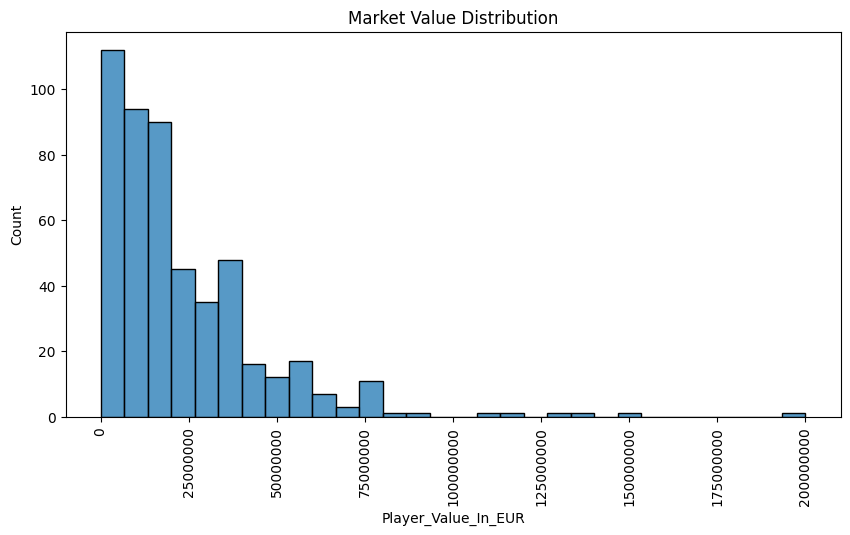

In [76]:
# Looking at the distribution of players market value in the EPL
plt.figure(figsize=(10,5))
player_value_distribution = sns.histplot(epl_final_merged_df['Player_Value_In_EUR'], bins=30)
player_value_distribution.ticklabel_format(style='plain', axis='x')
plt.title('Market Value Distribution')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'DEF'), Text(1, 0, 'MID'), Text(2, 0, 'GKP'), Text(3, 0, 'FWD')])

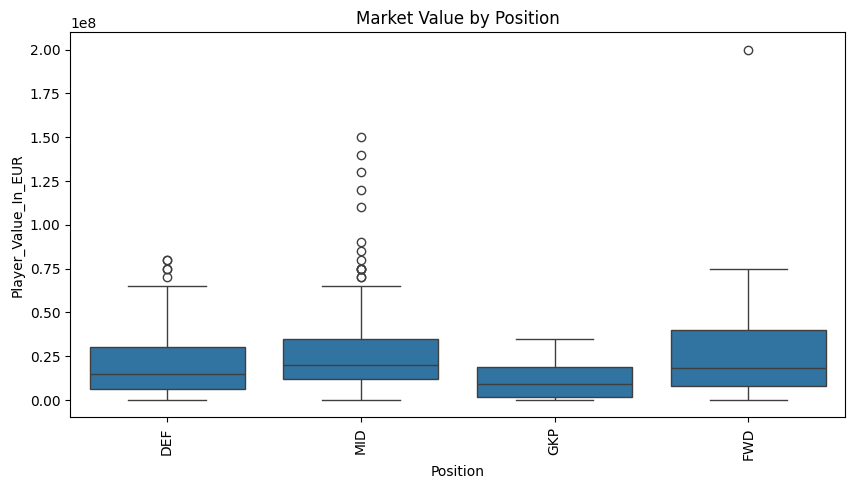

In [77]:
# Distribution of market value by position
plt.figure(figsize=(10,5))
sns.boxplot(data=epl_final_merged_df, x='Position', y='Player_Value_In_EUR')
plt.title('Market Value by Position')
plt.xticks(rotation=90)

In [78]:
# Average player market value per club
club_avg_player_value = epl_final_merged_df.groupby('Club')['Player_Value_In_EUR'].mean().sort_values(ascending=False).reset_index()
club_avg_player_value.rename(columns={'Player_Value_In_EUR':'Average Player Value (EUR)'}, inplace=True)

fig = px.bar(club_avg_player_value, 
             x='Club', 
             y='Average Player Value (EUR)',
             color='Average Player Value (EUR)',
             height=600,
             title='Average Player Value by Club')

fig.update_layout(xaxis_tickangle=-45,
                font=dict(size=16),
                xaxis_title_font=dict(size=16),
                yaxis_title_font=dict(size=16)
                )
fig.show()

#### From a footballing standpoint, players of different positions should be evaluated on different statistics. Hence, we would create a calculated feature '**Performance_Score**' to compare each players on a common ground.

- Measuring player performance based on weighted score of stats by position:
    - Weightage per feature: 0.5 – 0.3 – 0.2
    - Forwards: Goals - Assists - Conversion %
    - Midfielders: Assists - fThird Passes % - Tackles
    - Defenders: Tackles - Interceptions - Clean Sheets
    - Goalkeepers: Saves - Clean Sheets – Goals Prevented


In [79]:
epl_final_merged_df['Position'].unique()
epl_final_merged_df.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented',
       

In [80]:
# Calculate the performance score for each player based on their positions.
def calc_score(row):
    position = row['Position']

    if position == 'FWD':
        return 0.5*row['Goals'] + 0.3*row['Assists'] + 0.2*row['Conversion %']
    elif position == 'MID':
        return 0.5*row['Assists'] + 0.3*row['fThird Passes %'] + 0.2*row['Tackles']
    elif position == 'DEF':
        return 0.5*row['Tackles'] + 0.3*row['Interceptions'] + 0.2*row['Clean Sheets']
    else:
        return 0.5*row['Saves'] + 0.3*row['Clean Sheets'] + 0.2*row['Goals Prevented']

epl_final_merged_df['Performance Score'] = epl_final_merged_df.apply(calc_score, axis=1)

In [81]:
# Calculate each player's performance/value ratio
epl_final_merged_df['Performance/Value Ratio'] = epl_final_merged_df['Performance Score']/(epl_final_merged_df['Player_Value_In_EUR']/1000000)

In [82]:
top_10_value_players = epl_final_merged_df[['Player Name','Performance/Value Ratio','Club','Position']].sort_values(by='Performance/Value Ratio', ascending=False).head(10)

fig = px.bar(top_10_value_players, 
             x='Player Name', 
             y='Performance/Value Ratio',
             hover_data=['Club','Position'],
             height=600,
             title='Top 10 Value-For-Money Players')

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [83]:
fig = px.scatter(epl_final_merged_df, x='Player_Value_In_EUR', y = 'Performance Score', color='Player Name')
fig.show()

In [84]:
# Based on football context, used some key numerical features to explore for our model
corr_features = epl_final_merged_df[['Age','Appearances', 'Minutes', 'Goals', 'Assists', 'Conversion %', 'fThird Passes %', 'Tackles', 'Interceptions',
                                     'Clean Sheets', 'Saves', 'Goals Prevented', 'Performance Score', 'Player_Value_In_EUR']]
correlation_matrix = corr_features.corr(numeric_only=True)

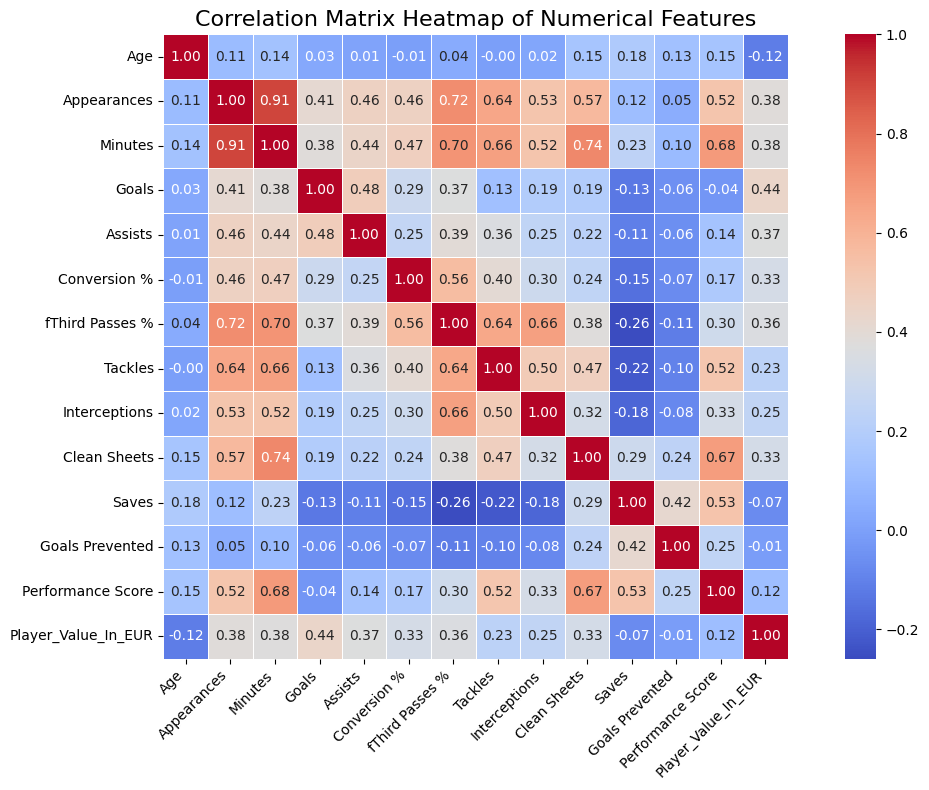

In [85]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

In [86]:
# One-hot encode position of players
position_dummy_df = pd.get_dummies(epl_final_merged_df['Position'],prefix='Position',drop_first=True)
position_dummy_df

,Position_FWD,Position_GKP,Position_MID
0,False,False,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
556,False,True,False
557,False,False,False
558,False,True,False
559,False,False,True


In [87]:
epl_final_merged_df_dummies = pd.concat([epl_final_merged_df,position_dummy_df],axis=1)
epl_final_merged_df_dummies

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,Conversion %,Big Chances Missed,Hit Woodwork,Offsides,Touches,Passes,Successful Passes,Passes%,Crosses,Successful Crosses,Crosses %,fThird Passes,Successful fThird Passes,fThird Passes %,Through Balls,Carries,Progressive Carries,Carries Ended with Goal,Carries Ended with Assist,Carries Ended with Shot,Carries Ended with Chance,Possession Won,Dispossessed,Clean Sheets,Clearances,Interceptions,Blocks,Tackles,Ground Duels,gDuels Won,gDuels %,Aerial Duels,aDuels Won,aDuels %,Goals Conceded,xGoT Conceded,Own Goals,Fouls,Yellow Cards,Red Cards,Saves,Saves %,Penalties Saved,Clearances Off Line,Punches,High Claims,Goals Prevented,Player_Value_In_EUR,Age,Performance Score,Performance/Value Ratio,Position_FWD,Position_GKP,Position_MID
0,Ben White,Arsenal,England,DEF,17,1198,0,2,9,12,0,0,0,1,833,1678,1493,1,51,10,0,714,592,1,4,583,296,0,0,5,17,107,6,5,38,23,6,20,231,116,0,16,5,0,0,0,0,10,2,0,0,0,0,0,0,0,0,55000000,27,18,0,False,False,False
1,Bukayo Saka,Arsenal,England,MID,25,1735,6,10,67,2,0,8,0,7,1094,643,556,1,1,0,0,55,33,1,1,167,69,0,0,1,0,44,40,2,6,15,14,29,58,34,1,45,23,1,0,0,0,15,3,0,0,0,0,0,0,0,0,140000000,23,11,0,False,False,True
2,David Raya,Arsenal,Spain,GKP,38,3420,0,0,0,0,0,0,0,0,1599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,29,0,0,0,0,0,0,0,0,0,34,36,0,1,3,0,86,1,0,0,8,53,2,35000000,29,47,1,False,True,False
3,Declan Rice,Arsenal,England,MID,35,2833,4,7,48,18,0,2,0,2,2016,789,641,1,63,7,0,480,364,1,11,411,260,3,2,18,22,121,32,7,50,13,5,53,342,121,0,26,10,0,0,0,0,21,5,1,0,0,0,0,0,0,0,120000000,26,14,0,False,False,True
4,Ethan Nwaneri,Arsenal,England,MID,26,889,4,0,24,0,0,0,3,6,601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,1,4,0,0,11,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,12000000,17,2,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,Sam Johnstone,Wolverhampton Wanderers,England,GKP,7,630,0,0,0,0,0,0,0,0,318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,2,8,0,10000000,31,12,1,False,True,False
557,Santiago Bueno,Wolverhampton Wanderers,Uruguay,DEF,29,1682,0,0,6,3,0,0,1,0,1046,1195,1077,1,18,7,0,325,278,1,1,292,144,0,0,4,4,109,2,4,70,28,7,41,212,102,0,44,19,0,0,0,0,26,2,0,0,0,0,0,0,0,0,8000000,26,30,4,False,False,False
558,Tom King,Wolverhampton Wanderers,Wales,GKP,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000,29,0,0,False,True,False
559,Tommy Doyle,Wolverhampton Wanderers,England,MID,24,475,0,1,9,0,0,1,0,0,478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,11,0,0,11,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,10000000,23,3,0,False,False,True


In [88]:
# Numerical features + Position of players (one-hot encoded)
corr_features_2 = epl_final_merged_df_dummies[['Age','Appearances', 'Minutes', 'Goals', 'Assists', 'Conversion %', 'fThird Passes %', 'Tackles', 'Interceptions',
                                     'Clean Sheets', 'Saves', 'Goals Prevented', 'Performance Score', 'Position_FWD', 'Position_GKP', 'Position_MID', 'Player_Value_In_EUR']]
correlation_matrix_2 = corr_features_2.corr(numeric_only=True)

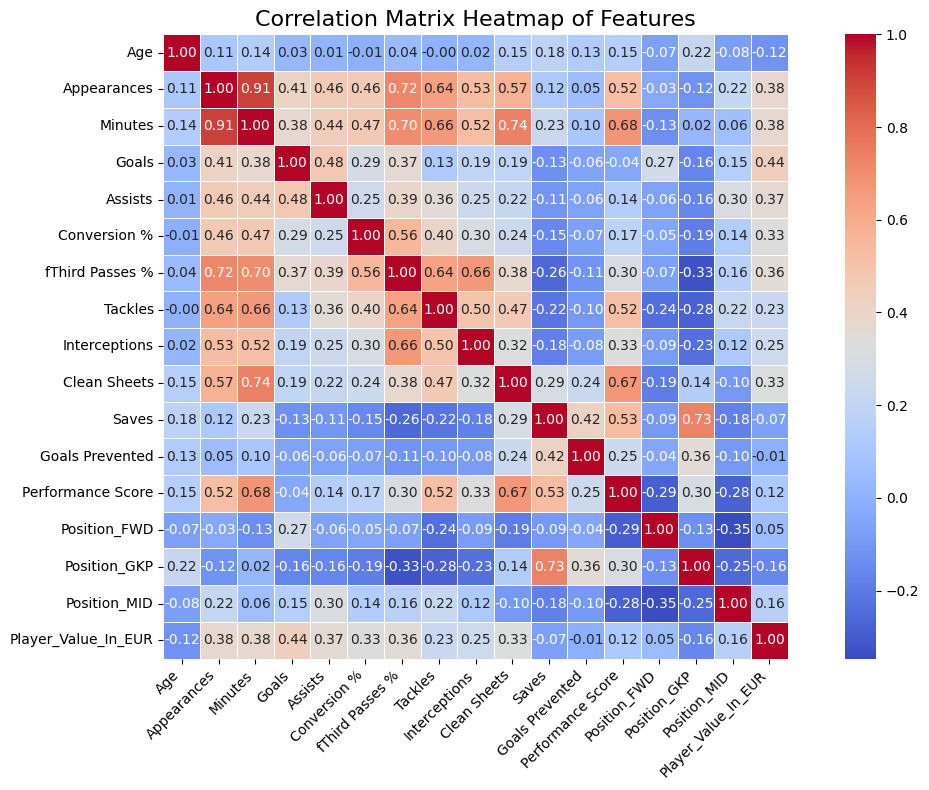

In [89]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    correlation_matrix_2,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Features', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

## Decision Tree Regressor to predict Player Value

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [91]:
feature_cols = ['Age','Appearances', 'Minutes', 'Goals', 'Assists', 'Conversion %', 'fThird Passes %', 'Tackles', 'Interceptions',
                'Clean Sheets', 'Saves', 'Goals Prevented', 'Performance Score', 'Position_FWD', 'Position_GKP', 'Position_MID']

In [92]:
# Assign features and player value from training data to X and y, respectively
X = epl_final_merged_df_dummies[feature_cols]
y = epl_final_merged_df_dummies.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
regressor = DecisionTreeRegressor(random_state=99)
regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 23737968, R2 score: -0.394


In [93]:
feature_cols_2 = ['Age','Appearances', 'Minutes', 'Goals', 'Conversion %', 'fThird Passes %', 'Assists', 'Tackles', 'Interceptions', 
                 'Clean Sheets', 'Performance Score', 'Position_FWD', 'Position_GKP', 'Position_MID']

In [94]:
# Assign features and player value from training data to X and y, respectively
X = epl_final_merged_df_dummies[feature_cols_2]
y = epl_final_merged_df_dummies.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
regressor = DecisionTreeRegressor(random_state=99)
regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 24670514, R2 score: -0.505


### DecisionTreeRegressor performance is not as expected. Let's drop and try other models.

## Random Forest Regressor to predict Player Value

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [96]:
# Assign features and player value from training data to X and y, respectively
X = epl_final_merged_df_dummies[feature_cols]
y = epl_final_merged_df_dummies.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
rf_regressor = RandomForestRegressor(random_state=99)
rf_regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = rf_regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 16115671, R2 score: 0.358


### Hyperparameter tuning feature_col with GridSearch

In [97]:
# Define the parameter grid to search
param_grid = {'max_depth': [3, 5, 7, None],  
              'min_samples_split': list(range(2,20)),
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=99),
                           param_grid=param_grid,
                           cv=2, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 2 folds for each of 288 candidates, totalling 576 fits

Best Hyperparameters found by GridSearchCV:
{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE score: 15333680
R2 score: 0.419


In [98]:
# Assign features and player value from training data to X and y, respectively
X = epl_final_merged_df_dummies[feature_cols_2]
y = epl_final_merged_df_dummies.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
rf_regressor = RandomForestRegressor(random_state=99)
rf_regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = rf_regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 15978510, R2 score: 0.369


### Hyperparameter tuning feature_col_2 with GridSearch

In [99]:
# Define the parameter grid to search
param_grid = {'max_depth': [3, 5, 7, None],  
              'min_samples_split': list(range(2,20)),
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=99),
                           param_grid=param_grid,
                           cv=2, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 2 folds for each of 288 candidates, totalling 576 fits

Best Hyperparameters found by GridSearchCV:
{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE score: 15303500
R2 score: 0.421


## Random Forest Regressor but remove outliers from the Player Value feature first

(array([-2.50e+07,  0.00e+00,  2.50e+07,  5.00e+07,  7.50e+07,  1.00e+08,
         1.25e+08,  1.50e+08,  1.75e+08,  2.00e+08,  2.25e+08]),
 [Text(-25000000.0, 0, '−0.25'),
  Text(0.0, 0, '0.00'),
  Text(25000000.0, 0, '0.25'),
  Text(50000000.0, 0, '0.50'),
  Text(75000000.0, 0, '0.75'),
  Text(100000000.0, 0, '1.00'),
  Text(125000000.0, 0, '1.25'),
  Text(150000000.0, 0, '1.50'),
  Text(175000000.0, 0, '1.75'),
  Text(200000000.0, 0, '2.00'),
  Text(225000000.0, 0, '2.25')])

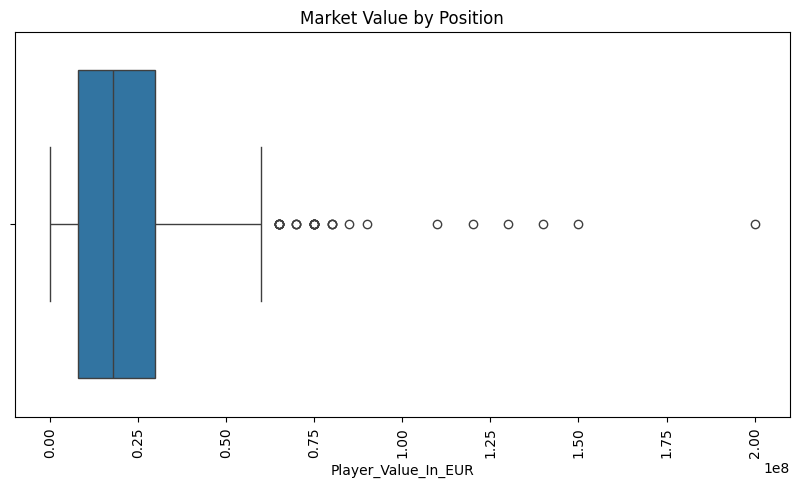

In [100]:
# Box Plot for Player Value
plt.figure(figsize=(10,5))
sns.boxplot(data=epl_final_merged_df_dummies, x='Player_Value_In_EUR')
plt.title('Market Value by Position')
plt.xticks(rotation=90)

In [101]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = epl_final_merged_df_dummies['Player_Value_In_EUR'].quantile(0.25)
Q3 = epl_final_merged_df_dummies['Player_Value_In_EUR'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
epl_df_dummies_no_outliers = epl_final_merged_df_dummies[(epl_final_merged_df_dummies['Player_Value_In_EUR'] >= lower_bound) &
                                (epl_final_merged_df_dummies['Player_Value_In_EUR'] <= upper_bound)]

Retry RandomForestRegressor with feature_cols

In [102]:
# Assign features and player value from training data to X and y, respectively
X = epl_df_dummies_no_outliers[feature_cols]
y = epl_df_dummies_no_outliers.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
rf_regressor = RandomForestRegressor(random_state=99)
rf_regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = rf_regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 13428963, R2 score: 0.306


In [103]:
# Define the parameter grid to search
param_grid = {'max_depth': [3, 5, 7, None],  
              'min_samples_split': list(range(2,20)),
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=99),
                           param_grid=param_grid,
                           cv=2, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 2 folds for each of 288 candidates, totalling 576 fits

Best Hyperparameters found by GridSearchCV:
{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 19}
RMSE score: 13415802
R2 score: 0.307


## Linear Regression to predict Player Value

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
# Assign features and player value from training data to X and y, respectively
X = epl_df_dummies_no_outliers[feature_cols]
y = epl_df_dummies_no_outliers.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = linreg.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 14226678, R2 score: 0.221


In [106]:
# Assign features and player value from training data to X and y, respectively
X = epl_df_dummies_no_outliers[feature_cols_2]
y = epl_df_dummies_no_outliers.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = linreg.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 14198151, R2 score: 0.224


Eliminate LinearRegression from consideration

## Polynomial Regression to predict Player Value

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
# Step 1: Assign features and target
X = epl_df_dummies_no_outliers[feature_cols]
y = epl_df_dummies_no_outliers['Player_Value_In_EUR']

# Step 2: Transform features to include polynomial terms (e.g., degree=2)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=99)

# Step 4: Train the polynomial regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = linreg.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 14226678, R2 score: 0.221


In [109]:
# Step 1: Assign features and target
X = epl_df_dummies_no_outliers[feature_cols_2]
y = epl_df_dummies_no_outliers['Player_Value_In_EUR']

# Step 2: Transform features to include polynomial terms (e.g., degree=2)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)

# Step 3: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=99)

# Step 4: Train the polynomial regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = linreg.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 14198151, R2 score: 0.224


## XGBoost to predict Player Value

In [110]:
from xgboost import XGBRegressor

In [111]:
# Step 1: Assign features and target
X = epl_df_dummies_no_outliers[feature_cols]
y = epl_df_dummies_no_outliers['Player_Value_In_EUR']

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# Step 3: Initialize and train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=99)
xgb_model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = xgb_model.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')


RMSE score: 14208326, R2 score: 0.223


In [112]:
# Define the parameter grid to search
param_grid = {'max_depth': [3, 5, 7, None],  
              'min_samples_split': list(range(2,20)),
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=99),
                           param_grid=param_grid,
                           cv=2, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 2 folds for each of 288 candidates, totalling 576 fits

Best Hyperparameters found by GridSearchCV:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
RMSE score: 13953906
R2 score: 0.251


c:\Users\Kevan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning:

[18:34:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




## From all the models tried, RandomForestRegression with hyperparameter tuning and removed outliers have the best performance. However, the RMSE score and R2 score are still not ideal. Let's try to explore more features.

In [113]:
epl_df_dummies_no_outliers.columns

Index(['Player Name', 'Club', 'Nationality', 'Position', 'Appearances',
       'Minutes', 'Goals', 'Assists', 'Shots', 'Shots On Target',
       'Conversion %', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',
       'Touches', 'Passes', 'Successful Passes', 'Passes%', 'Crosses',
       'Successful Crosses', 'Crosses %', 'fThird Passes',
       'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
       'Carries', 'Progressive Carries', 'Carries Ended with Goal',
       'Carries Ended with Assist', 'Carries Ended with Shot',
       'Carries Ended with Chance', 'Possession Won', 'Dispossessed',
       'Clean Sheets', 'Clearances', 'Interceptions', 'Blocks', 'Tackles',
       'Ground Duels', 'gDuels Won', 'gDuels %', 'Aerial Duels', 'aDuels Won',
       'aDuels %', 'Goals Conceded', 'xGoT Conceded', 'Own Goals', 'Fouls',
       'Yellow Cards', 'Red Cards', 'Saves', 'Saves %', 'Penalties Saved',
       'Clearances Off Line', 'Punches', 'High Claims', 'Goals Prevented',
       

In [114]:
feature_cols_3 = [
    # General performance
    'Age','Appearances', 'Minutes', 'Goals', 'Assists', 'Conversion %',
    'Touches', 'Passes%', 'Carries', 'Progressive Carries',
    'Carries Ended with Goal', 'Carries Ended with Assist', 'Carries Ended with Shot',

    # Attacking contributions
    'Shots', 'Shots On Target', 'Big Chances Missed', 'Hit Woodwork', 'Offsides',

    # Passing and creativity
    'Crosses', 'Successful Crosses', 'Crosses %',
    'fThird Passes', 'Successful fThird Passes', 'fThird Passes %', 'Through Balls',
    'Possession Won',

    # Defensive metrics
    'Clearances', 'Interceptions', 'Blocks', 'Tackles',
    'Ground Duels', 'gDuels %', 'Aerial Duels', 'aDuels %',

    # Goalkeeper metrics
    'Saves', 'Saves %', 'Penalties Saved',
    'Goals Conceded', 'xGoT Conceded', 'Goals Prevented',
    'Punches', 'High Claims',

    # Discipline
    'Fouls', 'Yellow Cards', 'Red Cards',

    # Player Positions
    'Position_FWD', 'Position_GKP', 'Position_MID'
    ]

In [115]:
corr_matrix_3 = epl_df_dummies_no_outliers[feature_cols_3].corr().abs()

# Upper triangle mask
upper = corr_matrix_3.where(np.triu(np.ones(corr_matrix_3.shape), k=1).astype(bool))

# Find features with correlation > 0.85 to prevent multicollinearity
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print("Highly correlated features to drop:", to_drop)

Highly correlated features to drop: ['Minutes', 'Touches', 'Progressive Carries', 'Shots On Target', 'Successful Crosses', 'fThird Passes', 'Successful fThird Passes', 'fThird Passes %', 'Possession Won', 'Ground Duels', 'gDuels %', 'aDuels %', 'Saves %', 'Goals Conceded', 'xGoT Conceded', 'High Claims']


In [116]:
# Drop the correlated features
feature_cols_3_refined = [feat for feat in feature_cols_3 if feat not in to_drop]
corr_matrix_3_refined = epl_df_dummies_no_outliers[feature_cols_3_refined].corr().abs()

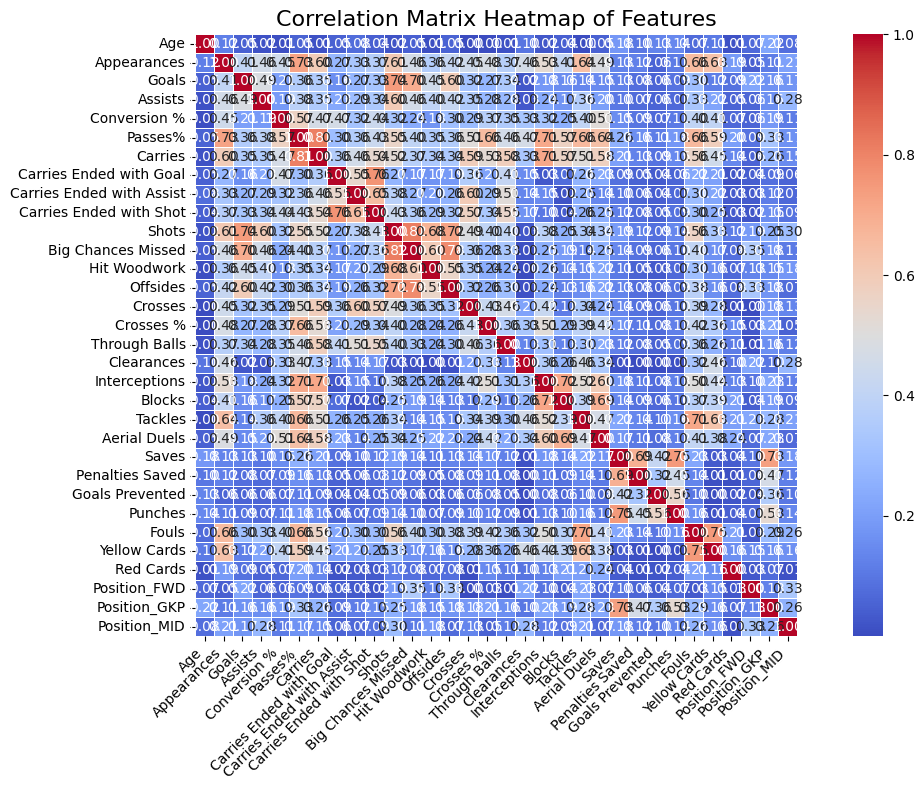

In [133]:
plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix_3_refined,
    annot=True,         
    cmap='coolwarm',   
    fmt=".2f",          
    linewidths=.5,      
    cbar=True,          
    square=True         
)

plt.title('Correlation Matrix Heatmap of Features', fontsize=16)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)             
plt.tight_layout()                 
plt.show()

In [134]:
# Assign features and player value from training data to X and y, respectively
X = epl_df_dummies_no_outliers[feature_cols_3_refined]
y = epl_df_dummies_no_outliers.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
rf_regressor = RandomForestRegressor(random_state=99)
rf_regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = rf_regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 13737990, R2 score: 0.274


In [135]:
# Define the parameter grid to search
param_grid = {'max_depth': [3, 5, 7, None],  
              'min_samples_split': list(range(2,20)),
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=99),
                           param_grid=param_grid,
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Best Hyperparameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
RMSE score: 13430079
R2 score: 0.306


## KNN Regression to predict Player Value

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [137]:
# Features and target
X = epl_df_dummies_no_outliers[feature_cols_3_refined]
y = epl_df_dummies_no_outliers.Player_Value_In_EUR

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# Standardize features (important for distance-based models like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 13777584, R2 score: 0.269


In [139]:
# Define the parameter grid to search
param_grid = {'n_neighbors': list(range(1, 21))}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsRegressor(),
                           param_grid=param_grid,
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters found by GridSearchCV:
{'n_neighbors': 17}
RMSE score: 14063634
R2 score: 0.239


## Final Model and Features

### Since Random Forest with feature_cols is the best performing, we will stick to this combination. However, we can further tune the feature_cols by removing feature that have similar meanings with other features such as - Appearance, Performance Score.

In [ ]:
feature_cols_4 = ['Age', 'Minutes', 'Goals', 'Assists', 'Conversion %', 'fThird Passes %', 'Tackles', 'Interceptions',
                'Clean Sheets', 'Saves', 'Goals Prevented', 'Position_FWD', 'Position_GKP', 'Position_MID']

In [146]:
# Assign features and player value from training data to X and y, respectively
X = epl_df_dummies_no_outliers[feature_cols_4]
y = epl_df_dummies_no_outliers.Player_Value_In_EUR

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

# Train our model using training data
rf_regressor = RandomForestRegressor(random_state=99)
rf_regressor.fit(X_train, y_train)

# Calculate predictions using our model
y_pred = rf_regressor.predict(X_test)

print (f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred):.0f}, R2 score: {metrics.r2_score(y_test, y_pred):.3f}')

RMSE score: 13098958, R2 score: 0.340


In [147]:
# Define the parameter grid to search
param_grid = {'max_depth': [3, 5, 7, None],  
              'min_samples_split': list(range(2,20)),
              'min_samples_leaf': [1, 2, 4, 8]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=99),
                           param_grid=param_grid,
                           cv=2, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=1)

# Use Grid Search to find the best parameters for our model
grid_search.fit(X_train, y_train)

# Obtain optimized parameters
print("\nBest Hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

print(f'RMSE score: {metrics.root_mean_squared_error(y_test, y_pred_tuned):.0f}')
print(f'R2 score: {metrics.r2_score(y_test, y_pred_tuned):.3f}')

Fitting 2 folds for each of 288 candidates, totalling 576 fits

Best Hyperparameters found by GridSearchCV:
{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 19}
RMSE score: 13162410
R2 score: 0.333


**For this Player Value Price Prediction model, we will use RandomForestRegressor with the features 'Age', 'Minutes', 'Goals', 'Assists', 'Conversion %', 'fThird Passes %', 'Tackles', 'Interceptions', 'Clean Sheets', 'Saves', 'Goals Prevented' and 'Position'**

**Results:**
**RMSE score: 13098958, R2 score: 0.340**

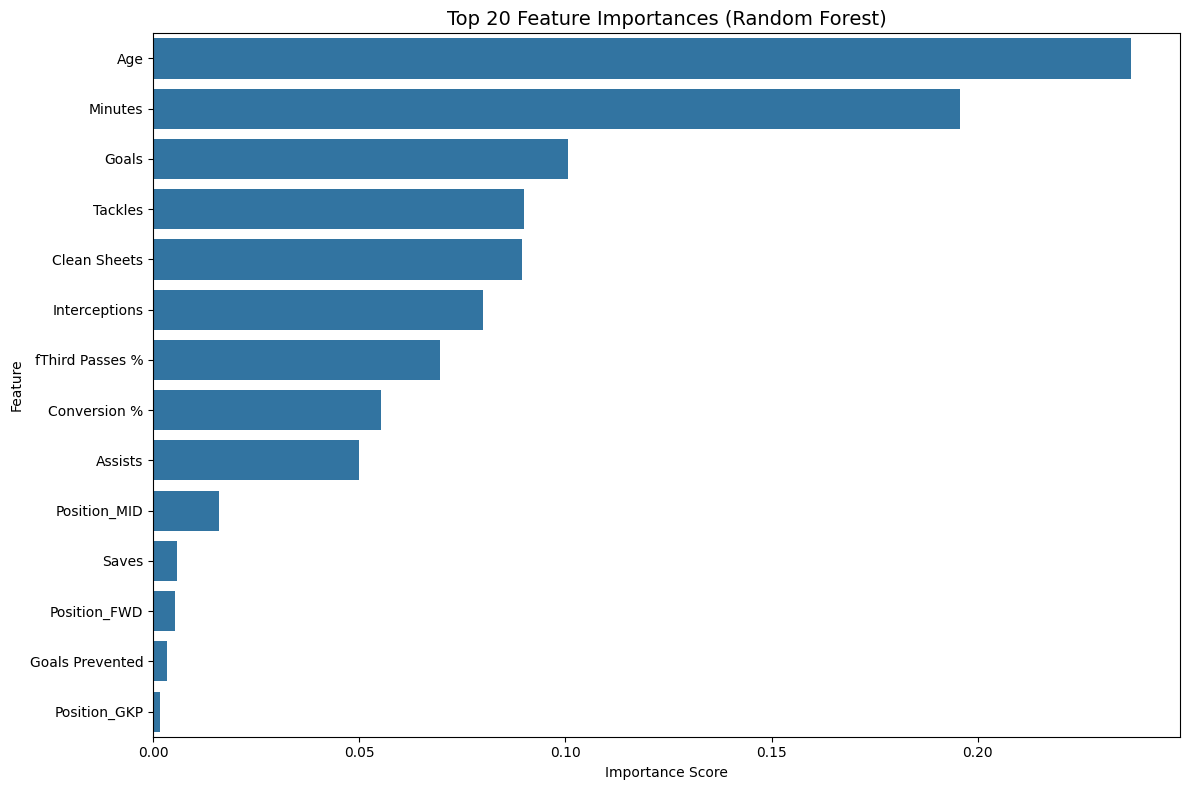

In [148]:
# Get feature importances and sort them
importances = rf_regressor.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))  # Top 20 features
plt.title('Top 20 Feature Importances (Random Forest)', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()